# Logistic Regression

In [9]:
import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

In [3]:
data_set= pd.read_csv('Social_Network_Ads.csv')  
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df = data_set.drop(['User ID'], axis =1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [17]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


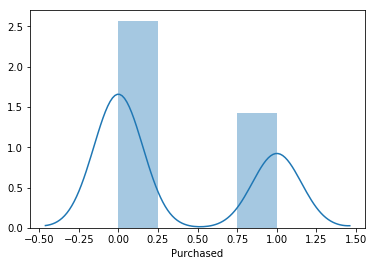

In [18]:
sns.distplot(df['Purchased'])

In [19]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


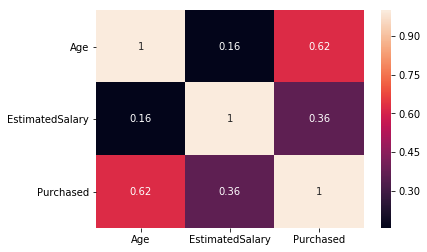

In [22]:
sns.heatmap(df.corr(),annot = True)

In [23]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [1,2]].values  
y= df.iloc[:, 3].values  

In [25]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [26]:
#In logistic regression, we will do feature scaling because we want accurate result of predictions. 
#Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it:


#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
#Fitting Logistic Regression to the Training set:

#We have well prepared our dataset, and now we will train the dataset using the training set.
#For providing training or fitting the model to the training set, we will import the LogisticRegression class of the 
#sklearn library.

from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# Predicting the Test Result

# Our model is well trained on the training set, so we will now predict the result by using test set data.

y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
#  Test Accuracy of the result

#Now we will create the confusion matrix here to check the accuracy of the classification. 
#To create it, we need to import the confusion_matrix function of the sklearn library. After importing the function,
#we will call it using a new variable cm. The function takes two parameters, mainly y_true( the actual values) and 
#y_pred (the targeted value return by the classifier).


#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

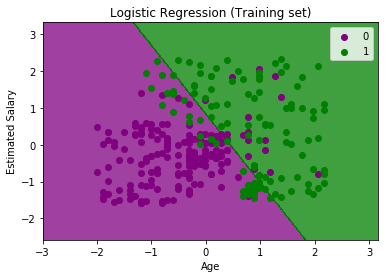

In [34]:
#Visualizing the training set result  

from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

* In the above code, we have imported the "ListedColormap" class of Matplotlib library to create the colormap for visualizing the result. We have created two new variables "x_set" and "y_set" to replace "x_train" and "y_train". After that, we have used the "nm.meshgrid" command to create a rectangular grid, which has a range of -1(minimum) to 1 (maximum). The pixel points we have taken are of 0.01 resolution.

* To create a filled contour, we have used "mtp.contourf" command, it will create regions of provided colors (purple and green).   In this function, we have passed the "classifier.predict" to show the predicted data points predicted by the classifier.

* The graph can be explained in the below points:

* In the above graph, we can see that there are some Green points within the green region and Purple points within the purple region.

* All these data points are the observation points from the training set, which shows the result for purchased variables.

* This graph is made by using two independent variables i.e., Age on the x-axis and Estimated salary on the y-axis.

* The purple point observations are for which purchased (dependent variable) is probably 0, i.e., users who did not purchase the   SUV car.

* The green point observations are for which purchased (dependent variable) is probably 1 means user who purchased the SUV car.

* We can also estimate from the graph that the users who are younger with low salary, did not purchase the car, whereas older     users with high estimated salary purchased the car.

* But there are some purple points in the green region (Buying the car) and some green points in the purple region(Not buying     the car). So we can say that younger users with a high estimated salary purchased the car, whereas an older user with a low     estimated salary did not purchase the car.

### The goal of the classifier:

We have successfully visualized the training set result for the logistic regression, and our goal for this classification is to divide the users who purchased the SUV car and who did not purchase the car. So from the output graph, we can clearly see the two regions (Purple and Green) with the observation points. The Purple region is for those users who didn't buy the car, and Green Region is for those users who purchased the car.

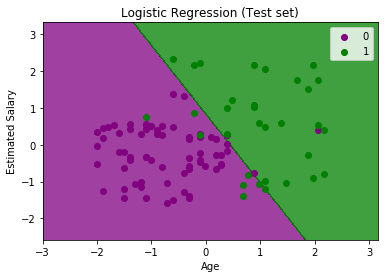

In [35]:
# Visualizing the test set result:


#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

* The above graph shows the test set result. As we can see, the graph is divided into two regions (Purple and Green). And Green observations are in the green region, and Purple observations are in the purple region. So we can say it is a good prediction and model. Some of the green and purple data points are in different regions, which can be ignored as we have already calculated this error using the confusion matrix (11 Incorrect output).

* Hence our model is pretty good and ready to make new predictions for this classification problem.